In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [29]:
df = pd.read_csv('fifa20_data.csv', low_memory=False)

In [22]:
df.describe()

,Age,Overall,Potential,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.00000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.000000,18547.00000,18547.000000,18547.00000
mean,25.238313,66.255459,66.255459,220055.715372,67.151992,5.282903,249.298862,49.820834,45.585647,52.257131,58.817599,42.817652,257.12595,55.651318,47.390953,42.726640,52.861703,58.495336,318.121044,64.425837,64.553567,63.508276,61.745350,63.888014,298.176956,58.188440,64.950073,62.991751,65.203699,46.842993,254.526878,55.881706,46.520893,50.108697,53.668464,48.347118,58.614493,140.507575,46.956112,47.790316,45.761147,81.997088,16.534264,16.305656,16.166119,16.325983,16.665067,1599.754354,356.669003,2.944573,2.367391,1.100879,67.574271,53.485308,57.785841,62.97164,50.116083,64.73586
std,4.675843,6.904721,6.904721,28005.502234,6.924998,5.565346,74.458902,18.258227,19.540164,17.363932,14.614471,17.666582,79.23170,18.875885,18.382398,17.400061,15.167497,16.692537,56.509283,15.058856,14.835831,14.797682,9.085673,14.183345,50.633766,13.305797,11.876299,15.956173,12.522776,19.293595,64.680776,17.221000,20.718042,19.544805,13.918003,15.688249,11.789775,61.384611,20.062539,21.526862,21.159666,85.232871,17.689241,16.956800,16.564755,17.093351,17.982329,269.258057,40.483496,0.666276,0.764048,0.375734,10.944387,13.843300,10.166932,10.09828,16.412060,9.58503
min,16.000000,47.000000,47.000000,41.000000,47.000000,0.000000,38.000000,6.000000,2.000000,5.000000,7.000000,3.000000,43.00000,4.000000,6.000000,4.000000,8.000000,5.000000,113.000000,12.000000,11.000000,11.000000,21.000000,12.000000,131.000000,14.000000,19.000000,12.000000,20.000000,4.000000,50.000000,9.000000,4.000000,2.000000,9.000000,7.000000,12.000000,21.000000,3.000000,5.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,740.000000,206.000000,1.000000,1.000000,1.000000,24.000000,15.000000,24.000000,23.00000,12.000000,27.00000
25%,21.000000,62.000000,62.000000,204690.500000,63.000000,0.000000,223.000000,38.000000,30.000000,45.000000,54.000000,30.000000,222.00000,50.000000,34.000000,31.000000,44.000000,54.000000,289.000000,57.000000,57.000000,56.000000,56.000000,56.000000,267.000000,48.000000,58.000000,56.000000,58.000000,32.000000,228.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,83.000000,29.000000,27.000000,24.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1458.000000,329.000000,3.000000,2.000000,1.000000,61.000000,44.000000,51.000000,58.00000,35.000000,59.00000
50%,25.000000,66.000000,66.000000,226414.000000,67.000000,4.000000,264.000000,54.000000,49.000000,55.000000,62.000000,44.000000,271.00000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,304.000000,59.000000,66.000000,66.000000,66.000000,51.000000,264.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,159.000000,52.000000,55.0

In [30]:
df.shape

(18547, 75)

In [23]:
df.columns

Index(['Name', 'Image', 'Country', 'Position', 'Age', 'Overall', 'Potential',
       'Club', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth',
       'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [24]:
df.set_index('ID', inplace=True)

cols_to_drop = [
    'Image',
    'Loan Date End',
]

df.drop(columns=cols_to_drop, inplace=True)



In [25]:
df['Age'] = df['Age'].astype(int)


In [26]:
def value_to_num(col):
    if pd.isnull(col): return 0
    
    value = col.replace('€', '').replace('M', '').replace('K', '')
    
    if col[-1] == 'M': unit = 1e6
    elif col[-1] == 'K': unit = 1e3
    else: unit = 1
    
    return int(float(value)*unit*1.11) # euro dollar rate

df['Value'] = df['Value'].apply(value_to_num)
df['Wage'] = df['Wage'].apply(value_to_num)
df['Release Clause'] = df['Release Clause'].apply(value_to_num)

In [27]:
money_format = '${:,.0f}'
df.head().style.format({'Value': money_format, 'Wage': money_format, 'Release Clause': money_format })

,Name,Country,Position,Age,Overall,Potential,Club,Height,Weight,foot,BOV,BP,Growth,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,Lionel Messi,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,"5'7""",159lbs,Left,95,CAM,0,"Jul 1, 2004","$106,005,000","$627,150","$217,338,000",433,88,95,70,92,88,472,97,93,94,92,96,458,91,84,93,95,95,391,86,68,75,68,94,351,48,40,94,94,75,96,96,33,37,26,54,6,11,15,14,8,2255,472,4,4,Medium,Low,5,87,92,92,96,39,66,585
20801,C. Ronaldo dos Santos Aveiro,Portugal,"ST,LW",34,93,93,Juventus,"6'2""",183lbs,Right,94,ST,0,"Jul 10, 2018","$64,935,000","$449,550","$107,115,000",437,84,94,89,83,87,415,89,81,76,77,92,434,89,91,87,96,71,446,95,95,85,78,93,354,63,29,95,82,85,95,84,28,32,24,58,7,11,15,14,11,2228,467,4,5,High,Low,5,90,93,82,89,35,78,448
190871,Neymar da Silva Santos Jr.,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,"5'9""",150lbs,Right,93,CAM,0,"Aug 3, 2017","$117,105,000","$321,900","$216,672,000",410,87,87,62,87,87,447,96,88,87,81,95,455,94,89,96,92,84,355,80,61,81,49,84,354,51,36,87,90,90,94,82,27,26,29,59,9,9,15,15,11,2162,448,5,5,High,Medium,5,91,85,87,95,32,58,432
200389,Jan Oblak,Slovenia,GK,26,91,91,Atlético Madrid,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014","$86,025,000","$138,750","$182,817,000",95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,436,87,92,78,90,89,1412,488,3,1,Medium,Medium,3,87,92,78,89,52,90,240
192985,Kevin De Bruyne,Belgium,"CAM,CM",28,91,91,Manchester City,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015","$99,900,000","$410,700","$184,815,000",404,93,82,55,92,82,436,86,85,83,91,91,398,77,76,78,91,76,407,91,63,89,74,90,398,76,61,88,94,79,91,177,68,58,51,56,15,13,5,10,13,2276,479,5,4,High,High,4,76,86,92,86,61,78,298


## Analisis de jugadores de futbol internacionales

FIFA 20 es un videojuego de simulación de fútbol desarrollado por EA Sports, como parte de la serie FIFA de Electronic Arts.
El sitio www.sofifa.com expone la información navegable de todos los jugadores del juego. Gracias a un crawler especifico (https://github.com/sagunsh/sofifa) se obtuvo un dataset de casi 19 mil jugadores y más de 70 atributos para cada jugador.
Este dataset contiene atributos técnicos de los jugadores, tales como dribbling (regate), potencia, agresion, habilidades como arquero, etc. También incluye información personal como nacionalidad, club, edad, salario, etc.
Se efectuó un pre procesado del dataset para corregir o mejorar algunas variables/dimensiones, más adelante se comentará cual fue el pre procesado realizado.

Objetivos del presente trabajo:
* Realizacion de un analisis exploratorio detallado y encontrar insights (revelaciones).
* Mostrar que características están altamente correlacionadas con la calificación general de un jugador por posición del jugador.
* Analizar las diferencias entre la calificación actual de un jugador y su calificación potencial.
* Averiguar qué equipos tienen el mayor potencial.
* Descubrir los equipos más jóvenes y equipos más avanzados en edad.
* Utilizar clustering kmeans para encontrar 'oportunidades', alguien con las mismas habilidades/potencial pero a un precio menor.


### Preprocesado

El dataset descargado contenia algunas particularidades. La valuacion, el sueldo y la clausula de contrato  estaban formateadas con el simbolo euro (€) y con notación inglesa de millones (M) o miles (K), ejemplo €370K o €95.5M que serian respectivamente 370.000 y 95.500.000 Euros. Se aprovechó el preprocesado para pasar estos valores númericos de Euros a Dólares Estadounidenses con un ratio de 1:1,11 .


# Analisis exploratorio
HACER LISTADO GENERAL DE COLUMNAS

df.isnull().any()

## Calificación general (Overall)
Se puede observar que la calificación general de los jugadores tiene una distribución normal, con una media de 66.25 y un desvio de 6.90. El mínimo puntaje es 41 y lo poseen 5 jugadores, 4 de ellos son Ingleses. El valor máximo lo tiene Lionel Messi con 94.

In [84]:
df['Overall'].describe()

count    18547.000000
mean        66.255459
std          6.904721
min         47.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [89]:
df[df['Overall'] == df['Overall'].min()]

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18542,Sam Booth,https://cdn.sofifa.org/players/4/20/253186.png,England,GK,18,47,47,Crewe Alexandra,253186,"6'5""",176lbs,Right,47,GK,8,"Aug 29, 2019",NaN,€30K,€1K,€59K,58,12,7,10,20,9,60,9,10,10,17,14,157,19,30,34,45,29,140,30,41,24,40,5,73,18,10,4,26,15,25,29,8,10,11,225,47,45,40,43,50,742,250,2,1,Medium,Medium,1,47,45,40,50,25,43,6
18543,Joshua Woodcock,https://cdn.sofifa.org/players/4/20/253204.png,England,"RB,CDM",16,47,47,Lincoln City,253204,"5'10""",157lbs,Right,47,RB,17,"Jul 1, 2019",NaN,€50K,€1K,€119K,157,42,24,36,33,22,161,45,26,32,26,32,307,65,65,71,44,62,220,26,70,55,43,26,192,48,47,37,28,32,32,130,36,50,44,56,8,13,14,12,9,1223,259,3,2,Medium,Medium,1,65,26,32,45,43,48,31
18544,Congyao Yin,https://cdn.sofifa.org/players/4/20/243097.png,China PR,"ST,CF",22,47,47,Chongqing Dangdai Lifan FC SWM Team,243097,"6'0""",163lbs,Right,51,CAM,10,"Apr 2, 2018",NaN,€50K,€1K,€88K,219,40,37,38,60,44,239,45,47,38,62,47,287,57,66,52,45,67,257,49,57,46,74,31,209,42,30,41,53,43,56,134,55,36,43,51,8,11,7,14,11,1396,302,3,2,Medium,Medium,1,62,39,53,47,41,60,22
18545,Gianluca Bucci,https://cdn.sofifa.org/players/4/20/252840.png,England,CB,16,47,47,Lincoln City,252840,"5'9""",157lbs,Left,48,CB,18,"Jul 1, 2019",NaN,€50K,€1K,€119K,153,26,20,43,45,19,154,33,28,25,36,32,286,70,65,62,31,58,225,33,71,46,52,23,166,41,42,21,27,35,29,144,41,54,49,53,5,12,12,11,13,1181,257,3,2,Medium,Medium,1,67,24,34,37,46,49,15
18546,Brandon McPherson,https://cdn.sofifa.org/players/4/20/252890.png,England,RM,17,47,47,Grimsby Town,252890,"5'10""",165lbs,Right,48,RM,14,"Jul 1, 2019",NaN,€60K,€1K,€143K,182,41,31,31,37,42,208,50,36,38,42,42,304,72,69,57,38,68,223,42,47,50,49,35,193,34,29,43,45,42,40,95,31,26,38,34,6,7,7,6,8,1239,271,3,3,Medium,Medium,1,70,36,40,49,30,46,4


In [88]:
df[df['Overall'] == df['Overall'].max()]

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",159lbs,Left,95,CAM,0,"Jul 1, 2004",NaN,€95.5M,€565K,€195.8M,433,88,95,70,92,88,472,97,93,94,92,96,458,91,84,93,95,95,391,86,68,75,68,94,351,48,40,94,94,75,96,96,33,37,26,54,6,11,15,14,8,2255,472,4,4,Medium,Low,5,87,92,92,96,39,66,585


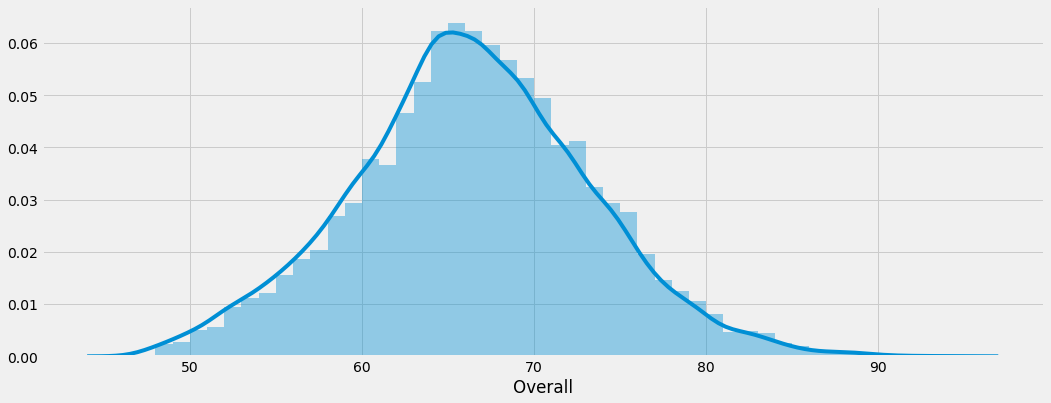

In [83]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Overall'], bins=47)

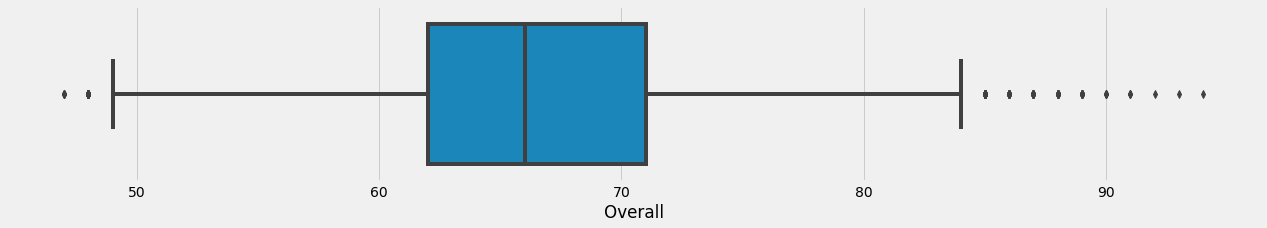

In [104]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df['Overall'])

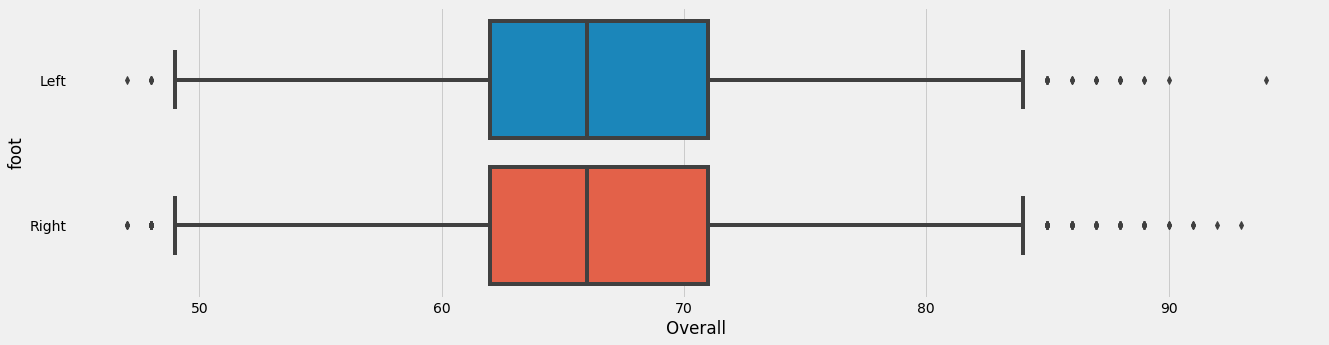

In [105]:
# overall entre zurdos y diestros
plt.figure(figsize=(20, 5))
sns.boxplot(x='Overall', y='foot', data=df)

### Edad vs Calificación General (Overall)
En este aspecto de edad en relación a la calificación promedio para esa edad se observa lo siguiente. Cuando se trata de la calificación general de un jugador, parece como si la calificación de los jugadores estuviera creciendo hasta alrededor de los 30 años de edad. De los 30 a los 35, la calificacion promedio se mantiene, podriamos decir que generalmente un jugador de 30 a 35 años esta en su etapa de meseta deportiva. Luego comienzan el inevitable declive alrededor de los 35 años, pero justamente vemos en el grafico, que el intervalo de confianza (95%) a partir de los 30 comienza a ampliarse, ya tenemos menos jugadores de esas edades y sus calificaciones son dispares. Ese pico a los 41 años se debe al Brasilero Vitorino Hilton da Silva (calificación 78)	y al Italiano Gianluigi Buffon (calificación 83), que como estamos mostrando promedios, su calificaciones a su edad son muy buenas y terminan distorsionando el valor promedio del grupo, en otras palabras, son outliers.	

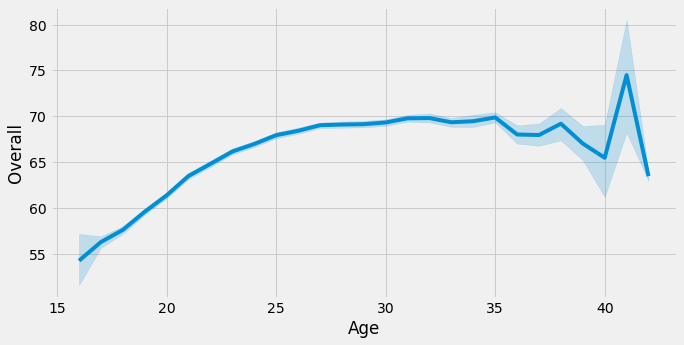

In [123]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Overall", data=df)

Invertidamente, podemos observar que desde la calificación minima (47) que tenemos en el dataset hasta un 70, hay una relacón directa (correlación) con la edad, que se meseta en los casi 28 años.

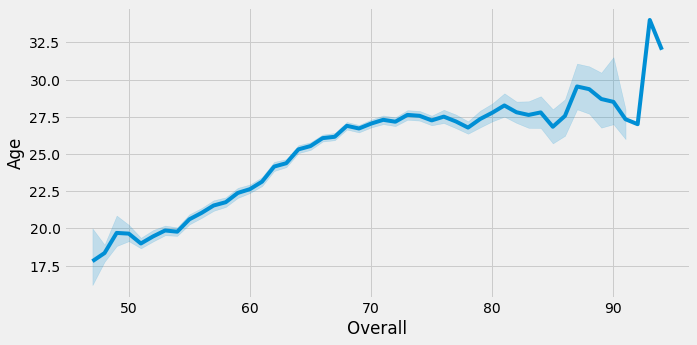

In [120]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Overall", y="Age", data=df)

In [113]:
df[df['Age'] >= 40].sort_values(by=['Age'])

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
7172,Dong Gook Lee,https://cdn.sofifa.org/players/4/20/136553.png,Korea Republic,ST,40,68,68,Jeonbuk Hyundai Motors,136553,"6'1""",176lbs,Right,70,ST,0,"Jan 1, 2009",NaN,€0,€4K,€0,352,65,75,70,58,84,322,54,78,68,56,66,249,34,53,33,66,63,323,67,72,36,81,67,303,44,32,76,65,86,73,61,30,15,16,48,11,6,12,10,9,1658,327,4,2,High,Low,3,44,73,62,57,29,62,14
15990,Michael Gurski,https://cdn.sofifa.org/players/4/20/104900.png,Germany,GK,40,59,59,SpVgg Unterhaching,104900,"6'2""",196lbs,Right,59,GK,0,"Jul 1, 2018",NaN,€20K,€1K,€29K,64,12,10,10,22,10,68,9,10,9,25,15,185,24,28,31,65,37,196,29,54,29,75,9,115,37,18,9,39,12,50,30,7,11,12,273,53,63,38,62,57,931,299,3,1,Medium,Medium,1,53,63,38,57,26,62,2
14475,Dannie Bulman,https://cdn.sofifa.org/players/4/20/53352.png,England,"CM,CDM",40,61,61,Crawley Town,53352,"5'9""",165lbs,Right,65,CDM,0,"Jul 1, 2017",NaN,€0,€1K,€0,232,45,33,52,65,37,274,55,44,48,62,65,258,44,47,38,59,70,343,60,76,81,72,54,277,77,63,49,50,38,64,171,59,58,54,67,11,16,13,16,11,1622,336,3,2,Medium,High,1,46,44,56,57,58,75,7
10647,Mauricio Caranta,https://cdn.sofifa.org/players/4/20/162952.png,Argentina,GK,40,65,65,Club Atlético Talleres,162952,"6'0""",170lbs,Right,65,GK,0,"Jan 13, 2016",NaN,€50K,€2K,€75K,68,12,12,12,20,12,67,10,11,10,22,14,260,45,51,49,71,44,241,50,74,38,66,13,140,32,24,13,48,23,65,38,15,11,12,318,54,69,66,67,62,1132,366,3,1,Medium,Medium,1,54,69,66,62,48,67,2
8748,Fabián Cubero,https://cdn.sofifa.org/players/4/20/142818.png,Argentina,CB,40,67,67,Vélez Sarsfield,142818,"5'9""",159lbs,Right,67,CB,0,"Jul 1, 2008",NaN,€0,€3K,€0,279,60,35,67,71,46,267,47,48,44,66,62,257,45,38,48,76,50,288,53,70,50,71,44,313,85,61,54,60,53,70,185,63,64,58,53,11,8,16,9,9,1642,332,3,2,Low,High,1,41,43,63,53,63,69,20
16430,Kevin Ellison,https://cdn.sofifa.org/players/4/20/2702.png,England,"LM,ST",40,58,58,Morecambe,2702,"5'11""",168lbs,Left,63,ST,0,"Jul 1, 2011",NaN,€0,€1K,€0,297,59,60,61,54,63,296,64,63,62,46,61,274,45,42,60,60,67,342,69,68,55,83,67,311,75,53,62,61,60,68,111,41,36,34,44,7,11,6,14,6,1675,342,3,2,High,Low,1,43,63,56,63,43,74,14
6095,Jean-François Gillet,https://cdn.sofifa.org/players/4/20/105308.png,Belgium,GK,40,69,69,Standard de Liège,105308,"5'11""",172lbs,Left,69,GK,0,"Jul 11, 2016",NaN,€110K,€3K,€165K,89,9,12,16,38,14,100,11,11,20,33,25,257,39,39,62,57,60,222,52,67,23,62,18,131,26,21,11,50,23,59,49,23,14,12,348,65,72,69,75,67,1196,387,2,1,Medium,Medium,2,65,72,69,67,39,75,3
18489,Ting Zhou,https://cdn.sofifa.org/players/4/20/182461.png,China PR,"LB,RB",40,49,49,Dalian YiFang FC,182461,"6'0""",161lbs,Right,56,ST,0,"Feb 15, 2017",NaN,€0,€1K,€0,246,45,49,49,53,50,259,58,51,44,47,59,294,65,39,71,52,67,251,50,49,36,72,44,264,56,53,62,44,49,57,134,35,50,49,50,10,12,7,15,6,1498,313,3,2,Low,High,1,51,49,48,60,46,59,15
4431,Tim Howard,https://cdn.sofifa.org/players/4/20/16254.png,United States,GK,40,71,71,Colorado Rapids,16254,"6'3""",194lbs,Right,71,GK,0,"Jul 4, 2016",NaN,€240K,€3K,€348K,86,16,13,12,33,12,102,13,14,14,32,29,242,49,39,38,66,50,238,54,69,26,74,15,154,34,17,13,57,33,54,44,18,12,14,355,72,72,72,71,68,1221,399,3,1,Medium,Medium,3,72,72,72,68,44,71,28
2788,Alberto Cifuentes Martínez,https://cdn.sofifa.org/players/4/20/110638.png,Spain,GK,40,73,73,Cádiz CF,110638,"6'2""",176lbs,Right,73,GK,0,"Jul 4, 2015",NaN,€400K,€4K,€640K,83,11,10,22,20,20,110,17,21,12,32,28,228,47,46,31,62,

In [132]:
df[df['Name'].str.contains('messias', case=False, regex=False)]

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
2406,Fabrício dos Santos Messias,https://cdn.sofifa.org/players/4/20/202350.png,Brazil,"ST,CF",29,74,74,Urawa Red Diamonds,202350,"6'0""",172lbs,Right,75,ST,0,"Jul 16, 2018",NaN,€5.5M,€14K,€7.2M,350,64,75,68,66,77,359,74,75,72,61,77,353,65,68,77,74,69,385,79,81,80,76,69,339,73,51,75,69,71,74,82,25,27,30,56,9,14,13,10,10,1924,396,2,4,High,Medium,1,67,75,66,75,36,77,11
6290,Messias Rodrigues Silva Jr.,https://cdn.sofifa.org/players/4/20/233614.png,Brazil,"CB,LB",24,69,69,Rio Ave FC,233614,"6'4""",194lbs,Right,70,CB,8,"Jan 22, 2014",NaN,€1.4M,€4K,€3.2M,212,34,25,72,47,34,170,33,27,21,41,48,260,60,59,34,65,42,288,54,69,61,84,20,257,77,65,37,31,47,54,204,73,67,64,39,6,5,14,7,7,1430,314,2,2,Medium,Medium,1,59,32,38,40,69,76,2
15006,Junior Messias,https://cdn.sofifa.org/players/4/20/240938.png,Brazil,"CF,ST",28,60,60,Crotone,240938,"5'9""",146lbs,Left,62,CAM,0,"Jan 31, 2019",NaN,€210K,€1K,€336K,280,55,57,52,60,56,328,69,69,72,58,60,314,68,65,66,47,68,278,65,53,58,41,61,221,29,14,56,60,62,46,58,27,19,12,52,8,8,15,9,12,1531,317,3,2,High,Medium,1,66,60,60,65,23,43,2
